In [ ]:
import os
import tensorstore as ts
import numpy as np

bucket = os.getenv('GRAYSCALE_BUCKET')
dataset_future = ts.open({
    'driver': 'neuroglancer_precomputed',
    'kvstore': bucket,
    'context': {
        'cache_pool': {
            'total_bytes_limit': 100_000_000
        }
    },
    'recheck_cached_data': 'open'
})

In [9]:
dataset = dataset_future.result()
dataset

In [4]:
dataset.domain

{ "x": [0, 94088), "y": [0, 78317), "z": [0, 134576), "channel": [0, 1) }

In [5]:
dataset_3d = dataset[ts.d['channel'][0]]
dataset_3d.domain

{ "x": [0, 94088), "y": [0, 78317), "z": [0, 134576) }

In [10]:
slice = dataset_3d[48000:48512, 29550:29550+512, 31583]
slice

In [7]:
slice = np.array(dataset_3d[48000:48512, 29550:29550+512, 31583])
slice

array([[  2,   1,  11, ..., 208, 217, 193],
       [  5,   1,   6, ..., 230, 204, 172],
       [  8,  13,  13, ..., 217, 145,  90],
       ...,
       [230, 136,  75, ...,  61,  82,  53],
       [210, 101, 112, ...,  82,  88, 110],
       [182,  71,  69, ..., 107,  99, 175]], dtype=uint8)

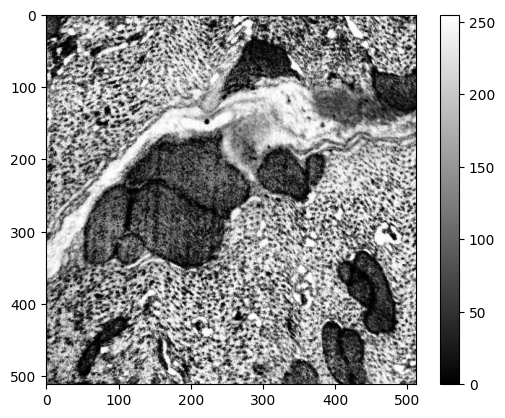

In [8]:
from matplotlib import pyplot as plt
plt.imshow(slice, cmap='gray')
plt.colorbar()